In [1]:
#import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'/Users/roxanamiu/20.03.2024_Instacart_Basket_Analysis'
efficient_ords_prods=pd.read_pickle(r'/Users/roxanamiu/20.03.2024_Instacart_Basket_Analysis/2.Data/Prepared_Data/efficient_ords_prods.pkl')

In [3]:
efficient_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order,product_id,product_name,department_id,prices,loyalty_flag,type_of_spender,frequency_flag,state,age,number_dependants,fam_status,income,region,max_order
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,9
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,9
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,9
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,9
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,New customer,Low spender,Non-frequent customer,Alabama,31,3,married,40423,South,9


In [4]:
# create income list
income = []

for value in efficient_ords_prods["income"]:
    if value < 50000:
        income.append("Low Income")
    elif value in range(50000,150000):
        income.append("Medium Income")
    else:
        income.append("High Income")

In [5]:
# create new income bracket 
efficient_ords_prods['income_bracket'] = income

In [6]:
efficient_ords_prods['income_bracket'].value_counts(dropna = False)

income_bracket
Medium Income    17162609
Low Income        9906636
High Income       3895275
Name: count, dtype: int64

In [7]:
# create parent list
result = []

for value in efficient_ords_prods["number_dependants"]:
    if value == 0:
        result.append("Non Parent")
    else:
        result.append("Parent")

In [8]:
# create parental_status column
efficient_ords_prods['parental_status'] = result

In [9]:
# create young adult flag
efficient_ords_prods.loc[efficient_ords_prods['age'].between(18,35), 'age_group'] = 'Young Adult'

In [10]:
# create middle-aged adult flag
efficient_ords_prods.loc[efficient_ords_prods['age'].between(36,64), 'age_group'] = 'Middle Aged Adult'

In [11]:
# create senior citizen flag
efficient_ords_prods.loc[efficient_ords_prods['age'] >= 65, 'age_group'] = 'Senior Citizen'

In [12]:
efficient_ords_prods['age_group'].value_counts(dropna = False)

age_group
Middle Aged Adult    14030171
Young Adult           8738805
Senior Citizen        8195544
Name: count, dtype: int64

In [13]:
efficient_ords_prods.head()

,order_id,user_id,order_number,orders_day_of_week,hour_of_order,days_since_prior_order,product_id,product_name,department_id,prices,...,state,age,number_dependants,fam_status,income,region,max_order,income_bracket,parental_status,age_group
0,2539329,1,1,2,8,NaN,196,Soda,7,9.0,...,Alabama,31,3,married,40423,South,9,Low Income,Parent,Young Adult
1,2398795,1,2,3,7,15.0,196,Soda,7,9.0,...,Alabama,31,3,married,40423,South,9,Low Income,Parent,Young Adult
2,473747,1,3,3,12,21.0,196,Soda,7,9.0,...,Alabama,31,3,married,40423,South,9,Low Income,Parent,Young Adult
3,2254736,1,4,4,7,29.0,196,Soda,7,9.0,...,Alabama,31,3,married,40423,South,9,Low Income,Parent,Young Adult
4,431534,1,5,4,15,28.0,196,Soda,7,9.0,...,Alabama,31,3,married,40423,South,9,Low Income,Parent,Young Adult


In [15]:
# create single young adult flag
efficient_ords_prods.loc[(efficient_ords_prods['age_group'] == 'Young Adult') & (efficient_ords_prods['parental_status'] == 'Non Parent'),
                'customer_profile'] = 'Single Young Adult'

In [16]:
# create young adult parent flag
efficient_ords_prods.loc[(efficient_ords_prods['age_group'] == 'Young Adult')
                & (efficient_ords_prods['parental_status'] == 'Parent'),
                'customer_profile'] = 'Young Adult Parent'

In [17]:
# create middle-aged single adult flag
efficient_ords_prods.loc[(efficient_ords_prods['age_group'] == 'Middle Aged Adult')
                & (efficient_ords_prods['parental_status'] == 'Non Parent'),
                'customer_profile'] = 'Middle-Aged Single Adult'

In [18]:
# create middle-aged parent flag
efficient_ords_prods.loc[(efficient_ords_prods['age_group'] == 'Middle Aged Adult')
                & (efficient_ords_prods['parental_status'] == 'Parent'),
                'customer_profile'] = 'Middle-Aged Parent'

In [19]:
# create single senior citizen flag
efficient_ords_prods.loc[(efficient_ords_prods['age_group'] == 'Senior Citizen')
                & (efficient_ords_prods['parental_status'] == 'Non Parent'),
                'customer_profile'] = 'Single Senior Citizen'

In [20]:
# create senior citizen parent flag
efficient_ords_prods.loc[(efficient_ords_prods['age_group'] == 'Senior Citizen')
                & (efficient_ords_prods['parental_status'] == 'Parent'),
                'customer_profile'] = 'Senior Citizen Parent'

In [21]:
efficient_ords_prods['customer_profile'].value_counts()

customer_profile
Middle-Aged Parent          10490138
Young Adult Parent           6561115
Senior Citizen Parent        6173586
Middle-Aged Single Adult     3540033
Single Young Adult           2177690
Single Senior Citizen        2021958
Name: count, dtype: int64

In [22]:
# group department_id and age_group
efficient_ords_prods.groupby('department_id')['customer_profile'].value_counts(dropna = False)

department_id  customer_profile        
1              Middle-Aged Parent          718582
               Young Adult Parent          450653
               Senior Citizen Parent       423146
               Middle-Aged Single Adult    241860
               Single Young Adult          146384
                                            ...  
21             Young Adult Parent           13939
               Senior Citizen Parent        12932
               Middle-Aged Single Adult      7145
               Single Young Adult            4807
               Single Senior Citizen         3983
Name: count, Length: 126, dtype: int64

<Figure size 0x0 with 0 Axes>

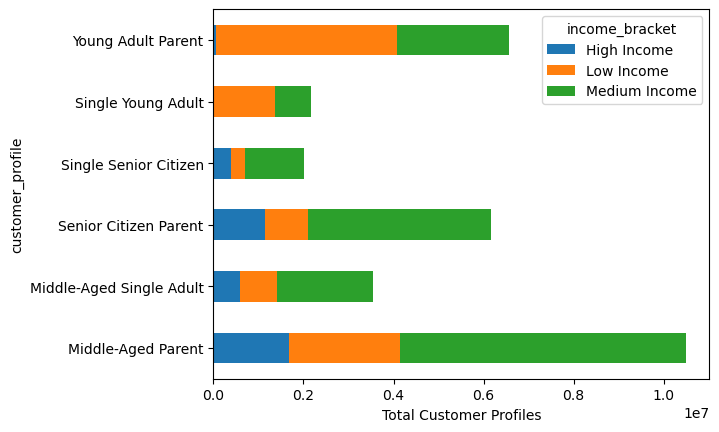

In [68]:
# plot horizontal bar chart
plt.figure(figsize = (0,0))
cust_prof = efficient_ords_prods.groupby(['customer_profile','income_bracket']).size().unstack().plot.barh(stacked=True).set_xlabel('Total Customer Profiles')

In [69]:
# export customer_profile/income chart
cust_prof.figure.savefig(os.path.join(path, '4.Analysis', 'Visualizations', 'cust_prof.png'))

In [26]:
# group region and customer profile columns
efficient_ords_prods.groupby('region')['customer_profile'].value_counts(dropna = False)

region   customer_profile        
Midwest  Middle-Aged Parent          2477875
         Young Adult Parent          1526857
         Senior Citizen Parent       1433965
         Middle-Aged Single Adult     861181
         Single Young Adult           491554
         Single Senior Citizen        470081
North    Middle-Aged Parent          1850164
         Young Adult Parent          1154071
         Senior Citizen Parent       1105968
         Middle-Aged Single Adult     578240
         Single Young Adult           397403
         Single Senior Citizen        378839
South    Middle-Aged Parent          3471923
         Young Adult Parent          2206515
         Senior Citizen Parent       2050724
         Middle-Aged Single Adult    1180300
         Single Young Adult           743896
         Single Senior Citizen        657737
West     Middle-Aged Parent          2690176
         Young Adult Parent          1673672
         Senior Citizen Parent       1582929
         Middle-Aged 

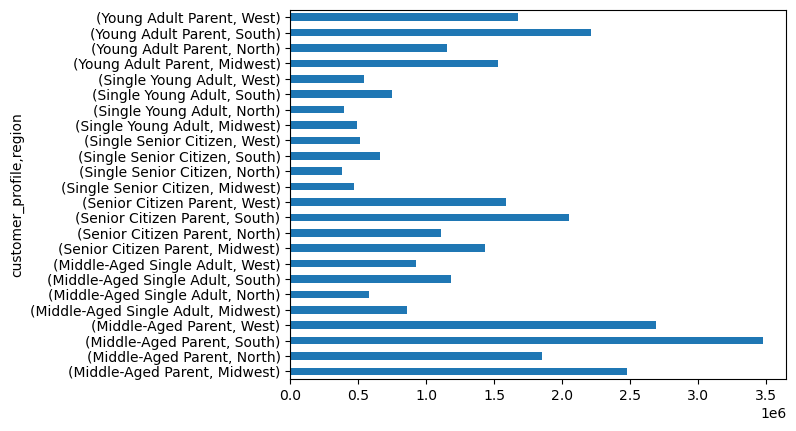

In [27]:
# create horizontal chart
customer_profile_region=efficient_ords_prods.groupby('customer_profile')['region'].value_counts(dropna=False).sort_index().plot.barh()

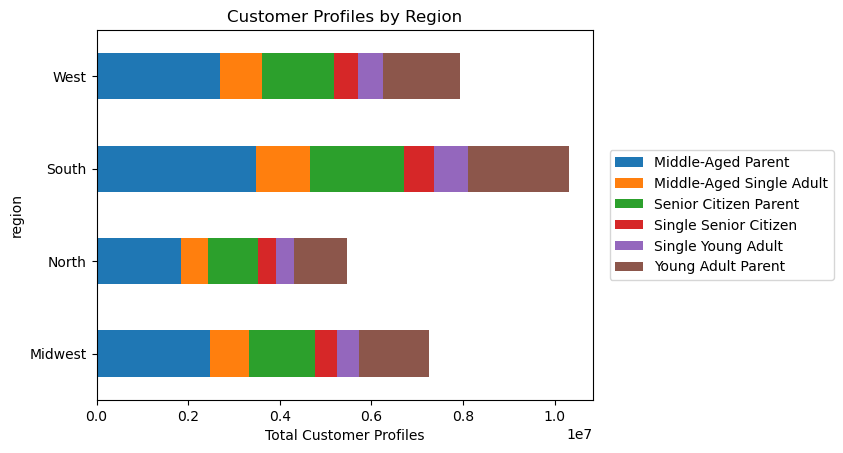

In [28]:
# create horizontal chart
region_bar = efficient_ords_prods.groupby(['region','customer_profile']).size().unstack().plot.barh(stacked = True).set_xlabel('Total Customer Profiles')
plt.title('Customer Profiles by Region')
plt.legend(loc = 'center right', bbox_to_anchor=(1.50,0.5))
plt.show()

In [29]:
# export customer profiles by region
region_bar.figure.savefig(os.path.join(path, '4.Analysis', 'Visualizations', 'region_bar.png'))

In [34]:
# aggregate customer_profile and days_since_prior_order
efficient_ords_prods.groupby('customer_profile').agg({'days_since_prior_order': ['mean','min','max']})

days_since_prior_order           
                                           mean  min   max
customer_profile                                          
Middle-Aged Parent                    10.832895  0.0  30.0
Middle-Aged Single Adult              10.739969  0.0  30.0
Senior Citizen Parent                 10.799413  0.0  30.0
Single Senior Citizen                 10.768514  0.0  30.0
Single Young Adult                    10.898283  0.0  30.0
Young Adult Parent                    10.806029  0.0  30.0

In [35]:
efficient_ords_prods['total_purchase'] = efficient_ords_prods.groupby('user_id')['prices'].transform('sum')

In [36]:
efficient_ords_prods.groupby('customer_profile')['total_purchase'].value_counts()

customer_profile    total_purchase
Middle-Aged Parent  12058.3           2973
                    22696.9           2901
                    21509.2           2888
                    10930.6           2765
                    6998.9            2747
                                      ... 
Young Adult Parent  38.1                 5
                    11.5                 5
                    15.0                 5
                    25.4                 5
                    64.5                 5
Name: count, Length: 102043, dtype: int64

In [37]:
# aggregate loyalty_flag, total_purchase, and days_since_prior_order
efficient_ords_prods.groupby('loyalty_flag').agg({'total_purchase': ['mean','min','max'], 'days_since_prior_order': ['mean', 'min', 'max']})

total_purchase                   days_since_prior_order       \
                           mean    min        max                   mean  min   
loyalty_flag                                                                    
Loyal customer      8089.330353  156.0  2101976.9               6.026656  0.0   
New customer        1345.178107    5.0   800423.2              17.598691  0.0   
Regular customer    3866.485593   15.7  2104114.1              12.155123  0.0   

                        
                   max  
loyalty_flag            
Loyal customer    30.0  
New customer      30.0  
Regular customer  30.0

In [39]:
# aggregate customer_profile, total_purchase, and days_since_prior_order
efficient_ords_prods.groupby('customer_profile').agg({'total_purchase': ['mean','min','max'], 'days_since_prior_order': ['mean', 'min', 'max']})

total_purchase                   \
                                   mean   min        max   
customer_profile                                           
Middle-Aged Parent          4898.778745  10.4  1302986.8   
Middle-Aged Single Adult    4925.288597   5.0  1302311.8   
Senior Citizen Parent       4907.531512   6.8  1409778.9   
Single Senior Citizen       4587.895554  15.7   800423.2   
Single Young Adult          4617.034113  10.5  2101976.9   
Young Adult Parent          4966.806455   7.0  2104114.1   

                         days_since_prior_order             
                                           mean  min   max  
customer_profile                                            
Middle-Aged Parent                    10.832895  0.0  30.0  
Middle-Aged Single Adult              10.739969  0.0  30.0  
Senior Citizen Parent                 10.799413  0.0  30.0  
Single Senior Citizen                 10.768514  0.0  30.0  
Single Young Adult                    10.898283  0.0  30.0  
Young Adult Parent                    10.806029  0.0  30.0

In [40]:
loyalty_dep_id = efficient_ords_prods.groupby(['loyalty_flag','department_id']).size().unstack()

Text(95.72222222222221, 0.5, 'Loyalty Flag')

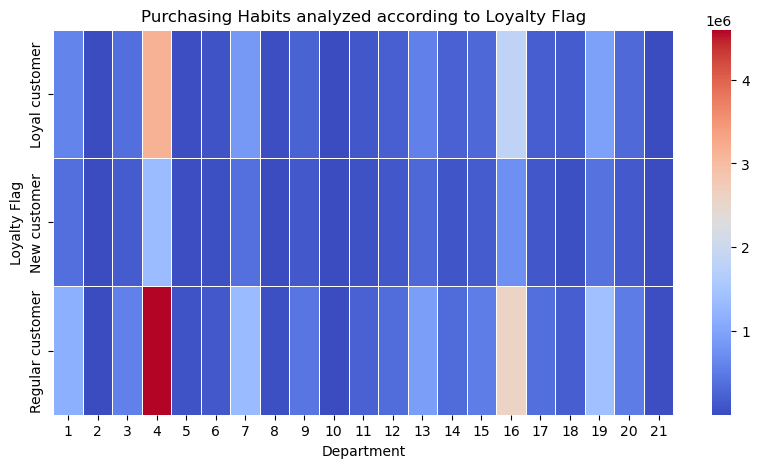

In [45]:
habits = plt.figure(figsize = (10,5))
plt.title('Purchasing Habits analyzed according to Loyalty Flag')
sns.heatmap(loyalty_dep_id, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department')
plt.ylabel('Loyalty Flag')

In [46]:
# export habits heatmap
habits.figure.savefig(os.path.join(path, '4.Analysis', 'Visualizations', 'habits_heatmap.png'))

In [48]:
region_dep_id = efficient_ords_prods.groupby(['region', 'department_id']).size().unstack()

In [72]:
region_dep_id

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
region,,,,,,,,,,,,,,,,,,,,,
Midwest,498225,7983,261753,2134115,34043,60666,598979,21358,193463,7929,...,158260,420334,156155,237459,1212490,166992,95741,645143,234464,15563
North,370436,6268,199300,1593004,25017,44678,462929,17734,143817,5599,...,118571,312731,117904,176936,914616,124604,72712,493154,178398,11512
South,709904,11579,371619,3027476,48813,84649,859418,29909,272813,11180,...,224120,591754,223172,337458,1723006,230061,139511,916760,333612,21787
West,543164,8581,288155,2324678,36754,65998,650574,24059,212043,8743,...,173830,457886,173619,260221,1327060,178200,102428,711329,257352,15906


In [73]:
crosstab = pd.crosstab(efficient_ords_prods['region'], efficient_ords_prods['department_id'], dropna = False)

In [74]:
crosstab.to_clipboard()

Text(0.5, 25.722222222222214, 'Department')

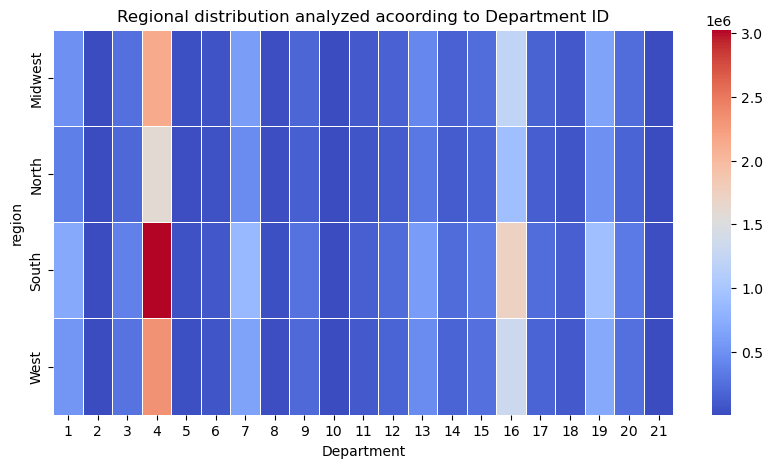

In [50]:
# create heatmap for region
region_heat = plt.figure(figsize = (10,5))
plt.title('Regional distribution analyzed acoording to Department ID')
sns.heatmap(region_dep_id, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department')

In [51]:
# export region heatmap
region_heat.figure.savefig(os.path.join(path, '4.Analysis', 'Visualizations', 'region_heat.png'))

In [52]:
cust_dept = efficient_ords_prods.groupby(['customer_profile','department_id']).size().unstack()

In [53]:
cust_dept

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
customer_profile,,,,,,,,,,,,,,,,,,,,,
Middle-Aged Parent,718582,11501,378772,3073784,48104,86533,875026,31464,279322,11305,...,228859,604661,227157,342524,1746411,240152,142575,936862,337991,21962
Middle-Aged Single Adult,241860,4018,129027,1041991,17445,29346,295464,10053,92917,3577,...,75380,202814,76980,114862,591163,77122,48148,315987,116773,7145
Senior Citizen Parent,423146,6791,223579,1813012,27554,50686,515378,18349,164020,6851,...,136819,356648,132810,202766,1029272,141616,80312,548253,199831,12932
Single Senior Citizen,141104,2155,72418,595092,9139,16513,168642,6766,53296,2094,...,44331,115735,42486,64743,338800,45014,25892,180296,65368,3983
Single Young Adult,146384,2541,79950,638358,10243,18602,181235,6783,58083,2329,...,46167,125355,46966,71415,364413,49222,29288,194155,71241,4807
Young Adult Parent,450653,7405,237081,1917036,32142,54311,536155,19645,174498,7295,...,143225,377492,144451,215764,1107113,146731,84177,590833,212622,13939


In [76]:
crosstab = pd.crosstab(efficient_ords_prods['department_id'], efficient_ords_prods['customer_profile'], dropna = False)

In [77]:
crosstab.to_clipboard()

Text(0.5, 25.722222222222214, 'Department ID')

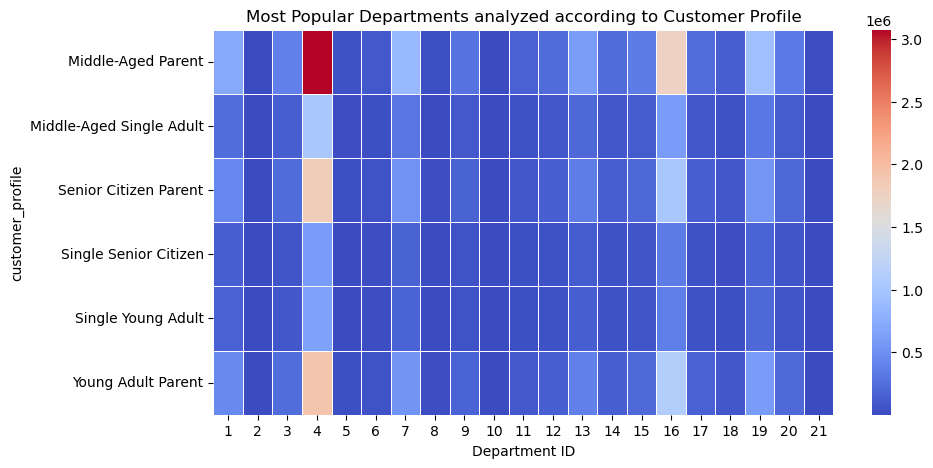

In [57]:
# create heatmap for customer profile and department id
dept_id_heat = plt.figure(figsize = (10,5))
plt.title('Most Popular Departments analyzed according to Customer Profile')
sns.heatmap(cust_dept, cmap = 'coolwarm', linewidth=.5)
plt.xlabel('Department ID')

In [63]:
# export customer profiles by region
dept_id_heat.figure.savefig(os.path.join(path, '4.Analysis', 'Visualizations', 'department_heat.png'))

In [60]:
efficient_ords_prods['department_id'].value_counts()

department_id
4     9079273
16    5177172
19    2766386
7     2571900
1     2121729
13    1782705
3     1120827
15    1012074
20    1003826
9      822136
17     699857
12     674781
14     670850
11     424304
18     410392
6      255991
5      144627
8       93060
21      64768
2       34411
10      33451
Name: count, dtype: int64

Text(0, 0.5, 'Count')

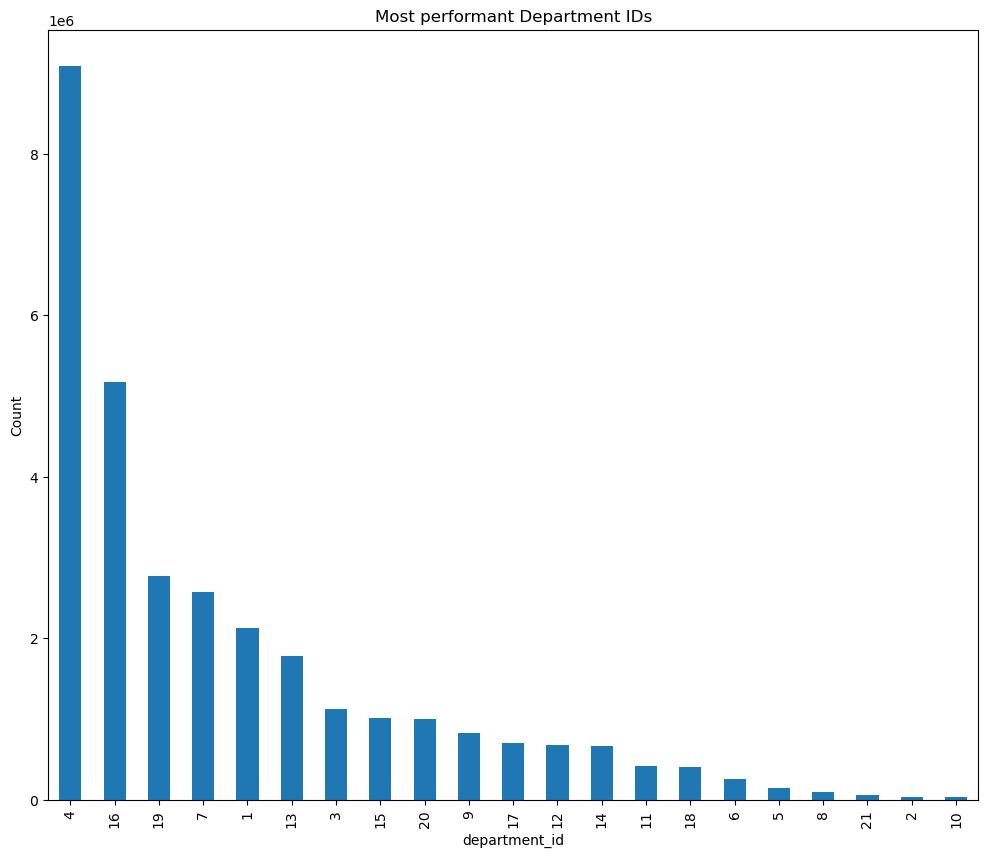

In [61]:
# create department id bar chart
plt.figure(figsize = (12,10))
dept_id_bar = efficient_ords_prods['department_id'].value_counts().plot.bar()
plt.title('Most performant Department IDs')
plt.ylabel('Count')

In [64]:
# export customer profiles by region
dept_id_bar.figure.savefig(os.path.join(path, '4.Analysis', 'Visualizations', 'department_bar.png'))